<a href="https://colab.research.google.com/github/satishgc227/git-test/blob/master/OTTO_RECOMMENDER_SYSTEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task overview :
The aim of this competition is to predict e-commerce clicks, cart additions, and orders. You'll build a multi-objective recommender system based on previous events in a user session.

Current recommender systems consist of various models with different approaches, ranging from simple matrix factorization to a transformer-type deep neural network. However, no single model exists that can simultaneously optimize multiple objectives. In this competition, you’ll build a single entry to predict click-through, add-to-cart, and conversion rates based on previous same-session events.

Import libraries:

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

In [8]:
#!pip install zipfile36

In [9]:
# if sys.version_info >= (3, 6):
#     import zipfile
# else:
#     import zipfile36 as zipfile


# file_name="otto-recommender-system.zip"

In [10]:
# # opening the zip file in READ mode
# with zipfile(file_name, 'r') as zip:
#     # printing all the contents of the zip file
#     zip.printdir()
  
#     # extracting all the files
#     print('Extracting all the files now...')
#     zip.extractall()
#     print('Done!')

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
df=pd.read_csv("/content/traian csv.csv")

In [13]:
df

,session,aid,ts,type
0,8000000,766953,1.660420e+12,clicks
1,8000000,1586093,1.660420e+12,clicks
2,8000000,1586093,1.660420e+12,clicks
3,8000000,682970,1.660420e+12,clicks
4,8000000,799794,1.660420e+12,clicks
...,...,...,...,...
29714,8002710,682102,1.661030e+12,clicks
29715,8002710,1136156,1.661030e+12,clicks
29716,8002710,1136156,1.661030e+12,clicks
29717,8002710,73022,1.661040e+12,clicks


Data preprocessing:

In [14]:
df.isnull().sum()

session    0
aid        0
ts         0
type       0
dtype: int64

In [15]:
df.dropna()

,session,aid,ts,type
0,8000000,766953,1.660420e+12,clicks
1,8000000,1586093,1.660420e+12,clicks
2,8000000,1586093,1.660420e+12,clicks
3,8000000,682970,1.660420e+12,clicks
4,8000000,799794,1.660420e+12,clicks
...,...,...,...,...
29714,8002710,682102,1.661030e+12,clicks
29715,8002710,1136156,1.661030e+12,clicks
29716,8002710,1136156,1.661030e+12,clicks
29717,8002710,73022,1.661040e+12,clicks


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29719 entries, 0 to 29718
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   session  29719 non-null  int64  
 1   aid      29719 non-null  int64  
 2   ts       29719 non-null  float64
 3   type     29719 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 928.8+ KB


In [17]:
# import json
# f=open("/content/test.jsonl")
# chunks=f.read()
# chunks

In [18]:
#print(chunks)

In [19]:
# import pandas as pd
# import json
# import glob
# from pandas.io.json import json_normalize

# json_files = glob.glob("*.json")
# dfs = []
# for file in json_files:
#     with open("/content/test.jsonl") as f:
#         for line in f.readlines():
#             df = pd.json_normalize(json.loads(line))
#             list_= ['','Item.metadata.M.timestamp.S','Item.sensor.M.celcius.N','Item.sensor.M.water.N']
#             df = df.loc[:, df.columns.isin(list_)]
#             dfs.append(df)
# df_combine = pd.concat(dfs, sort=False)
# df_combine.to_csv('json_to_raw.csv',index= None)

In [20]:
# import zipfile
# from google.colab import drive

# drive.mount('/content/drive/')

# zip_ref = zipfile.ZipFile("/content/drive/Othercomputers/My Laptop/Downloads/train.jsonl.zip", 'r')
# zip_ref.extractall("/content/drive/Othercomputers/My Laptop/Downloads/tmp")
# zip_ref.close()

In [21]:
# import json
# dd=open("/content/drive/Othercomputers/My Laptop/Downloads/tmp/train.jsonl")

In [22]:
# import pandas as pd
# chunks=pd.read_json(dd,lines=True, chunksize=1000)

In [23]:
#fg=pd.DataFrame(chunks)

In [24]:
df.shape

(29719, 4)

In [25]:
df['session'].unique()


array([8000000, 8000001, 8000002, ..., 8002708, 8002709, 8002710])

In [26]:
df.session.unique().shape

(2711,)

In [27]:
s=df.groupby('session')['aid','ts','type'].count()
print(s)

         aid   ts  type
session                
8000000    6    6     6
8000001    2    2     2
8000002    7    7     7
8000003    5    5     5
8000004  151  151   151
...      ...  ...   ...
8002706    4    4     4
8002707    5    5     5
8002708    6    6     6
8002709   73   73    73
8002710   39   39    39

[2711 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [28]:
df.ts

0        1.660420e+12
1        1.660420e+12
2        1.660420e+12
3        1.660420e+12
4        1.660420e+12
             ...     
29714    1.661030e+12
29715    1.661030e+12
29716    1.661030e+12
29717    1.661040e+12
29718    1.661040e+12
Name: ts, Length: 29719, dtype: float64

In [29]:
import datetime
d=df['ts'].max()
f=df['ts'].min()
f

1660420000000.0

In [30]:
datetime.datetime.fromtimestamp(f/1000),datetime.datetime.fromtimestamp(d/1000)

(datetime.datetime(2022, 8, 13, 19, 46, 40),
 datetime.datetime(2022, 8, 28, 20, 53, 20))

In [31]:
df['ts'].values

array([1.66042e+12, 1.66042e+12, 1.66042e+12, ..., 1.66103e+12,
       1.66104e+12, 1.66104e+12])

In [32]:
df['ts'].values[0]

1660420000000.0

In [33]:
session_duration = df.groupby('session').apply(lambda x: (x['ts'].values[-1] - x['ts'].values[0])/(1000*60*60))
session_duration.max()

361.1111111111111

Let's convert timestamp to the readable time:

In [34]:
df['ts']=pd.to_datetime(df['ts'])

In [35]:
b=df['ts']

In [36]:
print(f'Years:{b.dt.year.unique()} , \n Months"{b.dt.month.unique()}, \n Days:{b.dt.day.unique()} ')

Years:[1970] , 
 Months"[1], 
 Days:[1] 


In [37]:
df['ts_conv']=b


In [38]:
df_grouped= df.groupby('session')['ts_conv'].agg([min,max])

In [39]:
df_grouped['diff']=df_grouped['max']-df_grouped['min']

In [40]:
df_grouped['diff']

session
8000000          0 days 00:00:00
8000001   0 days 00:00:00.680000
8000002          0 days 00:00:00
8000003   0 days 00:00:00.950000
8000004   0 days 00:00:01.290000
                   ...          
8002706          0 days 00:00:00
8002707   0 days 00:00:00.650000
8002708   0 days 00:00:01.010000
8002709   0 days 00:00:00.690000
8002710   0 days 00:00:00.620000
Name: diff, Length: 2711, dtype: timedelta64[ns]

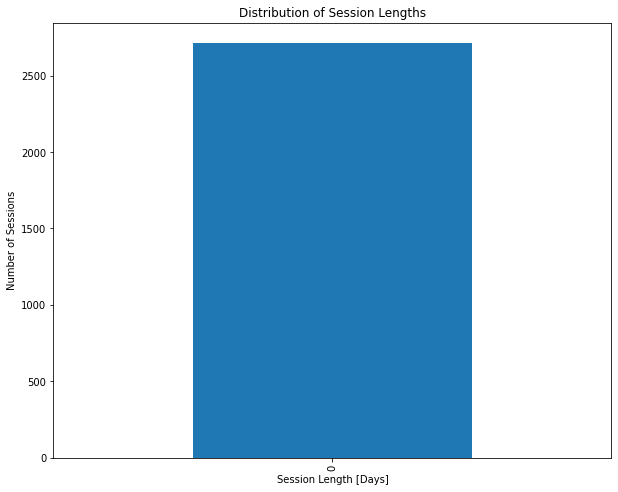

In [41]:
df_grouped['diff'].dt.days.sort_values().value_counts().plot(kind='bar', figsize=(10,8), title='Distribution of Session Lengths')
plt.xlabel('Session Length [Days]')
plt.ylabel('Number of Sessions')
plt.show()

In [42]:
idx_0=df_grouped.query('diff.dt.days==0').index.to_list()

In [43]:
# ind_0

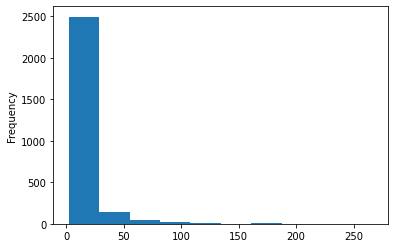

In [44]:
import matplotlib.pyplot as plt


df.groupby('session').size().plot.hist()


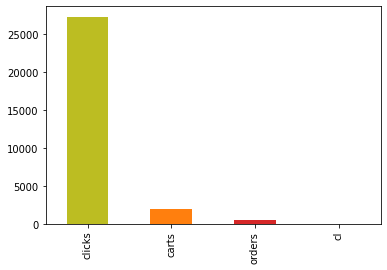

In [45]:
colors = ['tab:olive', 'tab:orange', 'tab:red']


df.query('session in @idx_0').type.value_counts(normalize=False).plot(kind='bar', color=colors)


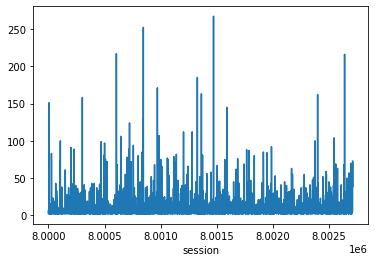

In [46]:
df.groupby('session').size().plot()

Let us find the last actions in a session:


In [47]:
list_last = [i[-1] for i in df.groupby('session').agg({'type' : lambda x: list(x)}).type.to_list()]


In [48]:
list_all = [item for sublist in df.groupby('session').agg({'type': lambda x: list(x)}).type.to_list() for item in sublist]   

Let's see how likely the session ends with order :


In [49]:
list_all.count('clicks'),list_all.count('orders'),list_all.count('carts')

(27266, 464, 1988)

In [50]:
for i in ['clicks','orders','carts']:
  print(f'it is {np.round((list_last.count(i)*len(list_all))/(list_all.count(i)*len(list_last)),1)} likely that the last actions were {i}')


it is 1.0 likely that the last actions were clicks
it is 1.8 likely that the last actions were orders
it is 0.6 likely that the last actions were carts


Hence it is likely that the session ends with half probability of carts but twice as that of orders.

Building an LSTM to predict the future aids:

In [52]:
df.aid.nunique()


17111

In [53]:
#shuffling in order to prevent any correlation between new labels and outcome :


In [66]:
ids=np.arange(df.aid.nunique())

In [67]:
ids

array([    0,     1,     2, ..., 17108, 17109, 17110])

In [72]:
np.random.shuffle(ids)

In [73]:
#mapping article id to integer encoding

In [74]:
map_aid={i:j for i,j in zip(df.aid.unique(),ids)}

In [76]:
#map_aid

In [78]:
df['aid_id']=df['aid'].map(map_aid)

In [81]:
df.head()

,session,aid,ts,type,ts_conv,aid_id
0,8000000,766953,1970-01-01 00:27:40.420,clicks,1970-01-01 00:27:40.420,5843
1,8000000,1586093,1970-01-01 00:27:40.420,clicks,1970-01-01 00:27:40.420,7897
2,8000000,1586093,1970-01-01 00:27:40.420,clicks,1970-01-01 00:27:40.420,7897
3,8000000,682970,1970-01-01 00:27:40.420,clicks,1970-01-01 00:27:40.420,4505
4,8000000,799794,1970-01-01 00:27:40.420,clicks,1970-01-01 00:27:40.420,11319


In [82]:
#Grouping the train data by session:

In [85]:
df_train= df.groupby('session').agg({'aid_id': lambda x : list(x)})

In [86]:
#let us now consider with only less than or equal 20 aids

In [91]:
df_train = df_train[df_train.aid_id.map(len) <= 20]

In [92]:
df_train.head()

,aid_id
session,
8000000,"[5843, 7897, 7897, 4505, 11319, 7897]"
8000001,"[14213, 14213]"
8000002,"[12221, 10926, 10352, 8901, 1978, 10926, 10926]"
8000003,"[15499, 9936, 13902, 13491, 12059]"
8000005,"[1411, 1411, 1411]"


In [93]:
#Padding to make all lists of same size

In [98]:
length = max(map(len,df_train.aid_id))

In [118]:
 X=np.asarray([[0]*(length-len(xi))+ xi for xi in df_train.aid_id])

In [120]:
X

array([[    0,     0,     0, ...,  4505, 11319,  7897],
       [    0,     0,     0, ...,     0, 14213, 14213],
       [    0,     0,     0, ...,  1978, 10926, 10926],
       ...,
       [    0,     0,     0, ..., 10525, 10790,  9856],
       [    0,     0,     0, ..., 15837,  4999,  4999],
       [    0,     0,     0, ...,  4812,  1300,  5039]])

In [121]:
#Train - test split